In [178]:
import numpy as np
import matplotlib.pyplot as plt

In [179]:
eegData = np.load('./data/EEG_all_epochs.npy')
eogData = np.load('./data/EOG_all_epochs.npy')
emgData = np.load('./data/EMG_all_epochs.npy')

In [180]:
eeg_shape = eegData.shape
eog_shape = eogData.shape
emg_shape = emgData.shape

print(f"eeg_shape: {eeg_shape}")
print(f"eog_shape: {eog_shape}")
print(f"emg_shape: {emg_shape}")

eeg_shape: (4514, 512)
eog_shape: (3400, 512)
emg_shape: (5598, 512)


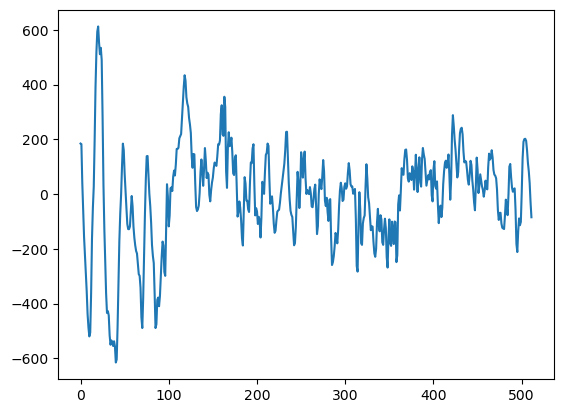

In [181]:
eeg1 = eegData[0]
eog1 = eogData[0]
emg1 = emgData[0]
plt.plot(eeg1)

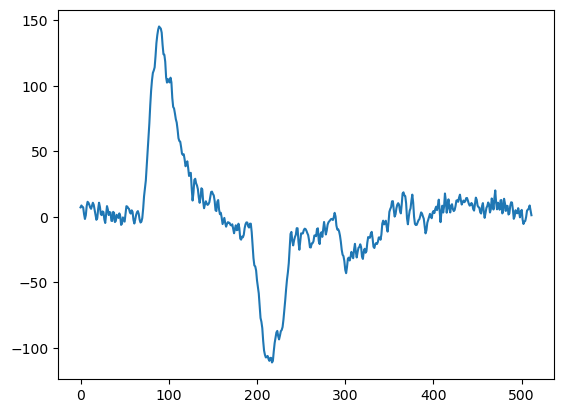

In [182]:
plt.plot(eog1)

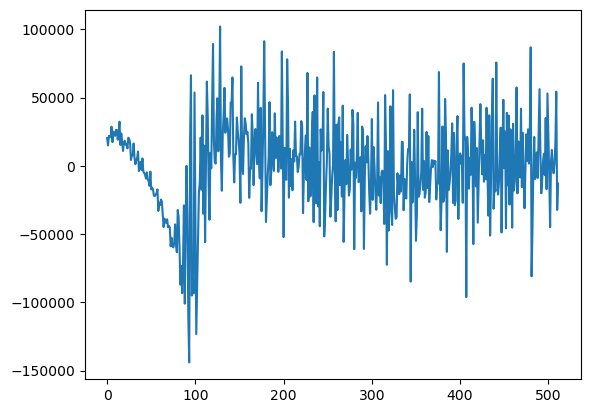

In [183]:
plt.plot(emg1)

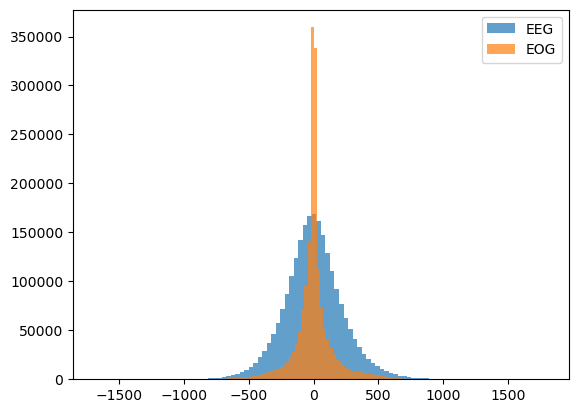

In [184]:
plt.hist(eegData.flatten(), bins=100, alpha=0.7, label="EEG")
plt.hist(eogData.flatten(), bins=100, alpha=0.7, label="EOG")
# plt.hist(emgData.flatten(), bins=10, alpha=0.7, label="EMG")

plt.legend();plt.show()

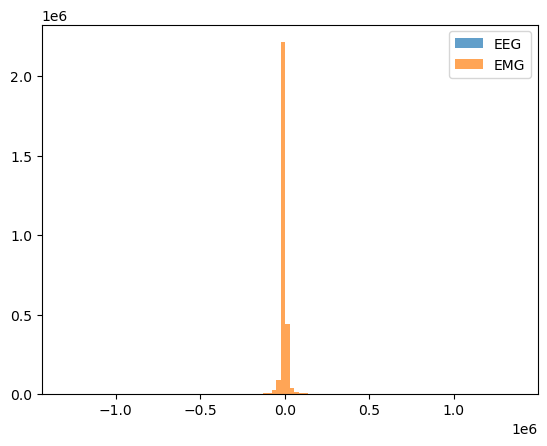

In [185]:
plt.hist(eegData.flatten(), bins=100, alpha=0.7, label="EEG")
plt.hist(emgData.flatten(), bins=100, alpha=0.7, label="EMG")

plt.legend();plt.show()

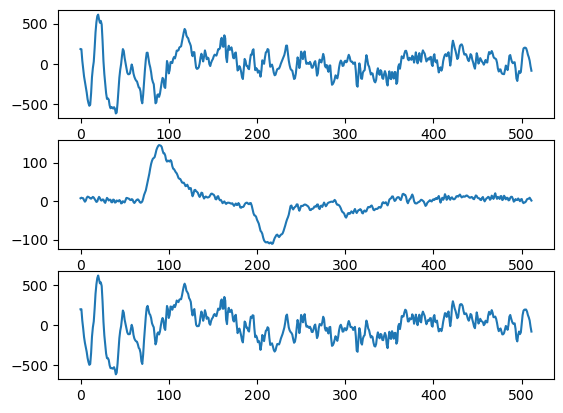

In [186]:
occularEEG_sample = eeg1 + np.dot(2, eog1)
fig, axes = plt.subplots(3)
axes[0].plot(eeg1)
axes[1].plot(eog1)
axes[2].plot(occularEEG_sample)

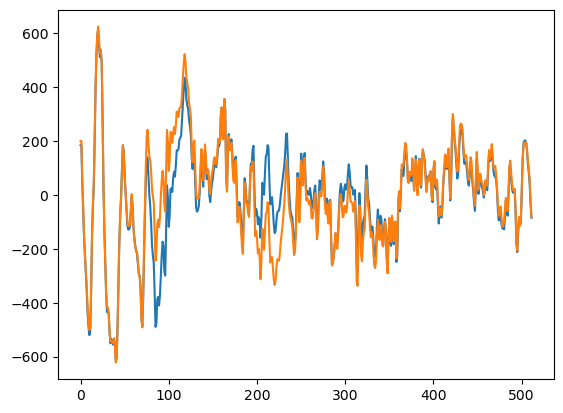

In [187]:
plt.plot(eeg1)
plt.plot(occularEEG_sample)

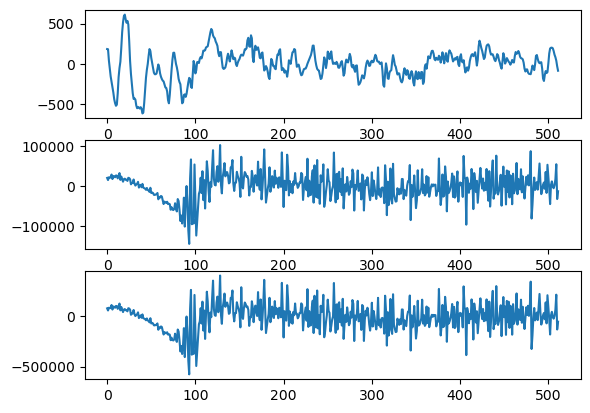

In [188]:
muscEEG_sample = eeg1 + np.dot(4, emg1)
fig, axes = plt.subplots(3)
axes[0].plot(eeg1)
axes[1].plot(emg1)
axes[2].plot(muscEEG_sample)

In [ ]:
from sklearn import preprocessing
def rms(records):
    return np.sqrt(np.mean(records**2))

def alpha (clean, art, target_snr , eps=1e-12):
    c = rms(clean)
    n = rms(art) + eps
    return (c/n) * 10**(-target_snr/10.0)

def snr (clean, noisy, eps = 1e-12):
    # clean = preprocessing.scale(clean)
    # noisy = preprocessing.scale(noisy)
    diff = noisy - clean
    snr = 10.0 * np.log10(rms(clean) /(rms(diff) + eps))
    return snr

In [203]:
target_snr = -2
sign = 1.0
def create_noisy(clean, artefact, target_snr):
    alph = alpha(clean, artefact, target_snr)
    art_add = sign*alph*artefact
    noisy = clean + art_add
    return noisy

In [204]:
res = create_noisy(eeg1, eog1, target_snr)

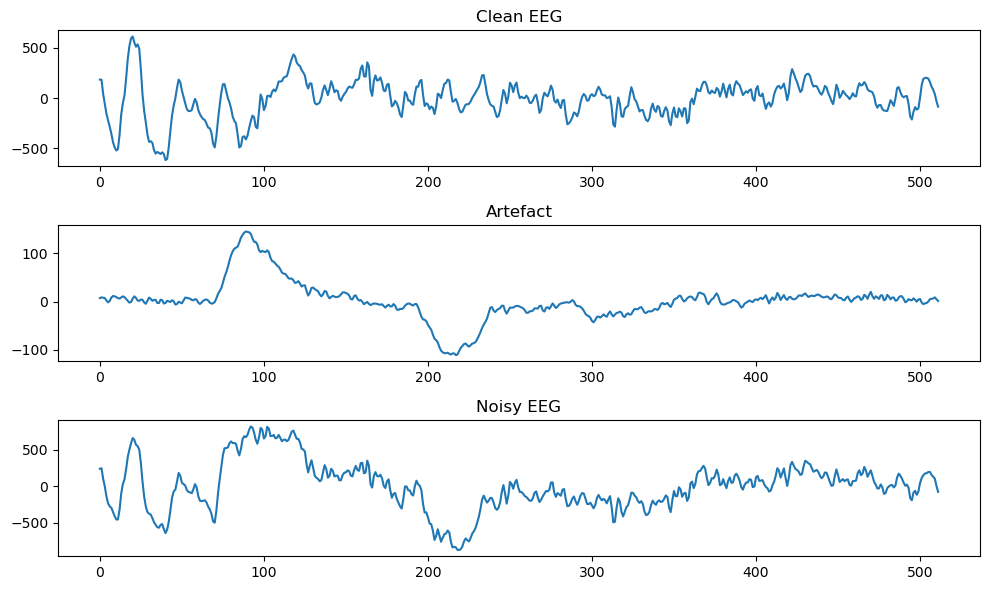

In [205]:
def create_EEG_Comp (clean, artefact, noisy):    
    fig, axis = plt.subplots(3, figsize=(10,6))
    axis[0].plot(clean)
    axis[0].set_title("Clean EEG")
    axis[1].plot(artefact)
    axis[1].set_title("Artefact")
    axis[2].plot(noisy)
    axis[2].set_title("Noisy EEG")

    plt.tight_layout()
    plt.show()

create_EEG_Comp(eeg1, eog1, create_noisy(eeg1, eog1,target_snr))

-0.1003897481610081


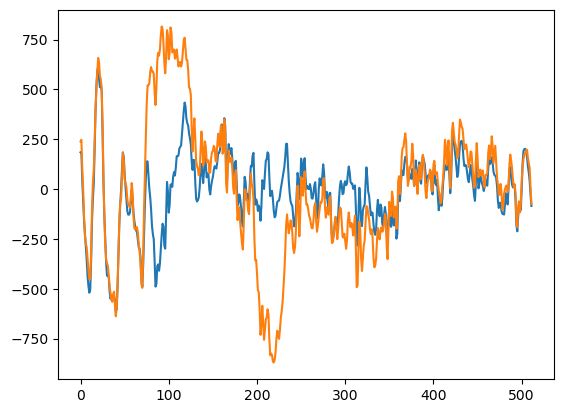

In [209]:
plt.plot(eeg1)
plt.plot(create_noisy(eeg1, eog1,target_snr))
print(snr(eeg1, create_noisy(eeg1, eog1,target_snr)))

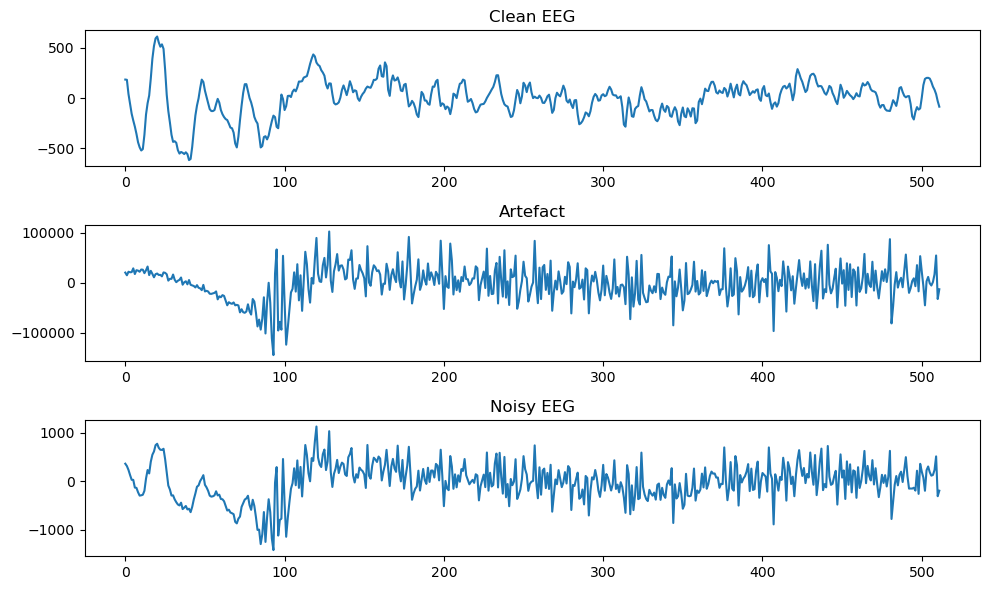

In [207]:
create_EEG_Comp(eeg1, emg1, create_noisy(eeg1, emg1, target_snr))

0.7815880165927327


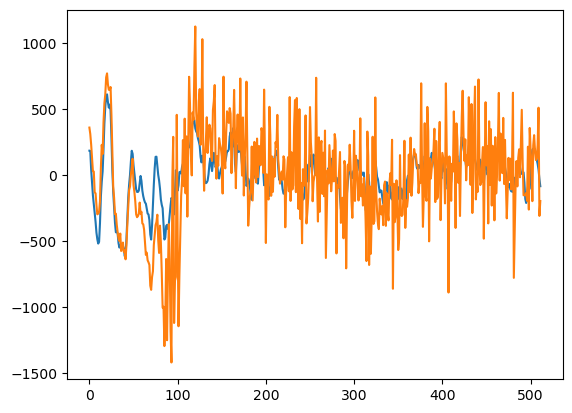

In [208]:
plt.plot(eeg1)
plt.plot(create_noisy(eeg1, emg1, target_snr))
print(snr(eeg1, create_noisy(eeg1, emg1,target_snr)))